In [118]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import matplotlib.pyplot as plt

In [86]:
result=pd.read_excel('NLP_conf_call_data.xlsx')# Sheet name matches exactly the sheet that we want to open. 
result.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'qtr_year', 'release_dt', 'title',
       'ticker', 'prev_day_ret%', 'release_day_ret%', 'next_day_ret%',
       'poss_early_release', 'speech', 'speech_sentiment_score',
       'speech_subjectivity', 'speech_complexity', 'speech_overall_sentiments',
       'Q_and_A', 'QA_sentiment_score', 'QA_subjectivity', 'QA_complexity',
       'Return_Driver', 'QA_overall_sentiments', 'overall_sentiment',
       'url_source', 'URL_SOURCE'],
      dtype='object')

In [87]:
Cor_Columns = ["speech_sentiment_score",'prev_day_ret%',
       'release_day_ret%', 'next_day_ret%',"QA_sentiment_score","overall_sentiment"]
df3=result.loc[:,Cor_Columns]
df3

,speech_sentiment_score,prev_day_ret%,release_day_ret%,next_day_ret%,QA_sentiment_score,overall_sentiment
0,0.180685,0.17,-0.77,-3.50,0.164414,Negative
1,0.166081,-4.64,3.71,-5.60,0.168146,Negative
2,0.161981,1.91,1.22,10.47,0.169234,Positive
3,0.191465,3.28,2.12,-1.62,0.148605,Negative
4,0.190458,-2.94,2.83,2.10,0.168459,Negative
...,...,...,...,...,...,...
485,0.146429,1.15,-0.95,-1.03,0.129343,Negative
486,0.088326,2.86,1.22,-2.32,0.155106,Negative
487,0.153779,-3.59,-0.15,-2.12,0.143404,Negative
488,0.128137,-1.01,0.29,0.69,0.133341,Positive


In [88]:
df3['SentimentType']=(df3['overall_sentiment']=='Positive').astype(int)
df3.corr()

,speech_sentiment_score,prev_day_ret%,release_day_ret%,next_day_ret%,QA_sentiment_score,SentimentType
speech_sentiment_score,1.000000,0.068524,-0.021550,-0.013614,0.133024,0.056057
prev_day_ret%,0.068524,1.000000,-0.178151,0.105959,-0.025811,0.111847
release_day_ret%,-0.021550,-0.178151,1.000000,-0.044005,-0.003592,-0.457670
next_day_ret%,-0.013614,0.105959,-0.044005,1.000000,0.017706,0.500794
QA_sentiment_score,0.133024,-0.025811,-0.003592,0.017706,1.000000,0.070186
SentimentType,0.056057,0.111847,-0.457670,0.500794,0.070186,1.000000


In [89]:
#Split the data into 80% training and 20% testing data sets
random.shuffle(df3.values)
d_part = np.random.rand(len(df3)) < 0.8
train = df3[d_part]
test = df3[~d_part]
train

,speech_sentiment_score,prev_day_ret%,release_day_ret%,next_day_ret%,QA_sentiment_score,overall_sentiment,SentimentType
0,0.180685,0.17,-0.77,-3.50,0.164414,Negative,0
1,0.166081,-4.64,3.71,-5.60,0.168146,Negative,0
2,0.161981,1.91,1.22,10.47,0.169234,Positive,1
5,0.207405,-2.31,-0.02,2.27,0.175123,Positive,1
6,0.225842,2.60,1.52,-6.63,0.163441,Negative,0
...,...,...,...,...,...,...,...
482,0.080192,-3.20,1.30,-1.52,0.161133,Negative,0
483,0.081360,1.60,1.25,0.76,0.161049,Negative,0
485,0.146429,1.15,-0.95,-1.03,0.129343,Negative,0
486,0.088326,2.86,1.22,-2.32,0.155106,Negative,0


In [113]:
x_train=train[["speech_sentiment_score",'prev_day_ret%',
       'release_day_ret%', 'next_day_ret%',"QA_sentiment_score"]]
y_train=train["SentimentType"]
x_test=test[["speech_sentiment_score",'prev_day_ret%',
       'release_day_ret%', 'next_day_ret%',"QA_sentiment_score"]]
y_test=test["SentimentType"]
x_train


,speech_sentiment_score,prev_day_ret%,release_day_ret%,next_day_ret%,QA_sentiment_score
0,0.180685,0.17,-0.77,-3.50,0.164414
1,0.166081,-4.64,3.71,-5.60,0.168146
2,0.161981,1.91,1.22,10.47,0.169234
5,0.207405,-2.31,-0.02,2.27,0.175123
6,0.225842,2.60,1.52,-6.63,0.163441
...,...,...,...,...,...
482,0.080192,-3.20,1.30,-1.52,0.161133
483,0.081360,1.60,1.25,0.76,0.161049
485,0.146429,1.15,-0.95,-1.03,0.129343
486,0.088326,2.86,1.22,-2.32,0.155106


In [96]:
logit_model=sm.Logit(y_train,x_train)
logresult=logit_model.fit(maxiter=35)
print(logresult.summary2())

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [97]:
## model Creation on train Data[Decision Tree]
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train,y_train)
print('Accuracy of Decision Tree classifier: {:.2f}'
     .format(clf.score(x_train,y_train)))
## testing the accuracy on test data
print('Accuracy of Decision Tree classifier for test data: {:.2f}'
     .format(clf.score(x_test,y_test)))

Accuracy of Decision Tree classifier: 1.00
Accuracy of Decision Tree classifier for test data: 0.93


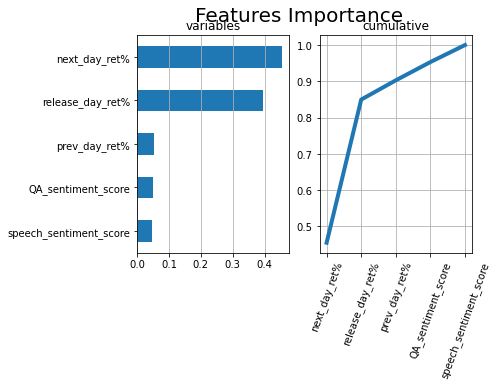

In [98]:
feature_names = x_train.columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=0)
model.fit(x_train,y_train)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [115]:
## predicting the dataset
clf.predict(new_dataset)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.128  0.8   -0.3    1.2    1.3  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1]:
## Developing KNN Model

In [99]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [100]:
## Classification using KNNClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [101]:
## Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[39  4]
 [ 4 41]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.91      0.91      0.91        45

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



Text(0, 0.5, 'Mean Error')

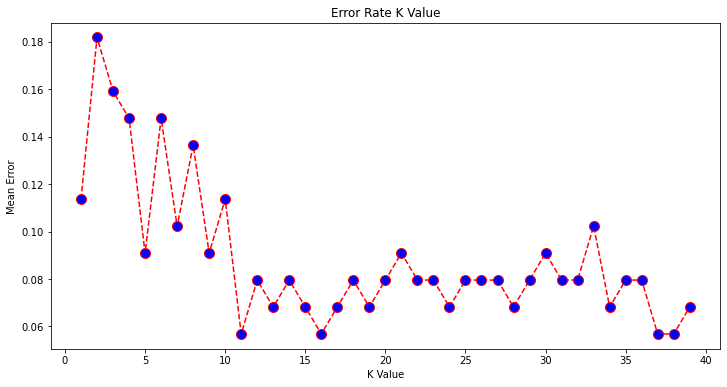

In [102]:
# Finding the best K value basis error rate
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

# plotting the k-value graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [103]:
### Classifying with K=23
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  2]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.95      0.93      0.94        45

    accuracy                           0.94        88
   macro avg       0.94      0.94      0.94        88
weighted avg       0.94      0.94      0.94        88



In [21]:
## predicting a new dataset
new_speech_sentiment_score = 0.128
new_QA_sentiment_score =0.8
prev_day_ret = -0.3
release_day_ret =1.2
next_day_ret=1.3
new_dataset =[new_speech_sentiment_score,new_QA_sentiment_score,prev_day_ret,release_day_ret,next_day_ret]
print(classifier.predict(new_dataset))

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.128  0.8   -0.3    1.2    1.3  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [104]:
MVR_Columns = ["speech_sentiment_score",'prev_day_ret%',
       'release_day_ret%',"QA_sentiment_score","overall_sentiment","next_day_ret%"]
MVR_df=result.loc[:,MVR_Columns]
MVR_df

,speech_sentiment_score,prev_day_ret%,release_day_ret%,QA_sentiment_score,overall_sentiment,next_day_ret%
0,0.180685,0.17,-0.77,0.164414,Negative,-3.50
1,0.166081,-4.64,3.71,0.168146,Negative,-5.60
2,0.161981,1.91,1.22,0.169234,Positive,10.47
3,0.191465,3.28,2.12,0.148605,Negative,-1.62
4,0.190458,-2.94,2.83,0.168459,Negative,2.10
...,...,...,...,...,...,...
485,0.146429,1.15,-0.95,0.129343,Negative,-1.03
486,0.088326,2.86,1.22,0.155106,Negative,-2.32
487,0.153779,-3.59,-0.15,0.143404,Negative,-2.12
488,0.128137,-1.01,0.29,0.133341,Positive,0.69


In [105]:
MVR_df['SentimentType']=(MVR_df['overall_sentiment']=='Positive').astype(int)
MVR_df.describe()

,speech_sentiment_score,prev_day_ret%,release_day_ret%,QA_sentiment_score,next_day_ret%,SentimentType
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.173100,0.141571,0.289469,0.167242,0.128510,0.489796
std,0.095050,2.414539,3.626375,0.058386,4.129608,0.500407
min,0.000000,-19.790000,-16.770000,0.000000,-19.350000,0.000000
25%,0.120632,-0.740000,-1.255000,0.155681,-1.757500,0.000000
50%,0.159953,0.260000,0.050000,0.173785,-0.100000,0.000000
75%,0.196518,1.422500,1.605000,0.192948,1.480000,1.000000
max,0.800000,11.740000,28.280000,0.400000,26.040000,1.000000


In [106]:
random.shuffle(MVR_df.values)
mvr_part = np.random.rand(len(MVR_df)) < 0.8
mvr_train = MVR_df[d_part]
mvr_test = MVR_df[~d_part]
mvr_train     
     
      



,speech_sentiment_score,prev_day_ret%,release_day_ret%,QA_sentiment_score,overall_sentiment,next_day_ret%,SentimentType
0,0.180685,0.17,-0.77,0.164414,Negative,-3.50,0
1,0.166081,-4.64,3.71,0.168146,Negative,-5.60,0
2,0.161981,1.91,1.22,0.169234,Positive,10.47,1
5,0.207405,-2.31,-0.02,0.175123,Positive,2.27,1
6,0.225842,2.60,1.52,0.163441,Negative,-6.63,0
...,...,...,...,...,...,...,...
482,0.080192,-3.20,1.30,0.161133,Negative,-1.52,0
483,0.081360,1.60,1.25,0.161049,Negative,0.76,0
485,0.146429,1.15,-0.95,0.129343,Negative,-1.03,0
486,0.088326,2.86,1.22,0.155106,Negative,-2.32,0


In [107]:
## Train & Test data
mvrx_train=mvr_train[["speech_sentiment_score",'prev_day_ret%',
       'release_day_ret%',"QA_sentiment_score","SentimentType"]]
mvry_train=mvr_train['next_day_ret%']
mvrx_test=mvr_test[["speech_sentiment_score",'prev_day_ret%',
       'release_day_ret%',"QA_sentiment_score","SentimentType"]]
mvry_test=mvr_test["next_day_ret%"]
#x_train
mvrx_train

,speech_sentiment_score,prev_day_ret%,release_day_ret%,QA_sentiment_score,SentimentType
0,0.180685,0.17,-0.77,0.164414,0
1,0.166081,-4.64,3.71,0.168146,0
2,0.161981,1.91,1.22,0.169234,1
5,0.207405,-2.31,-0.02,0.175123,1
6,0.225842,2.60,1.52,0.163441,0
...,...,...,...,...,...
482,0.080192,-3.20,1.30,0.161133,0
483,0.081360,1.60,1.25,0.161049,0
485,0.146429,1.15,-0.95,0.129343,0
486,0.088326,2.86,1.22,0.155106,0


In [108]:
result.dtypes

Unnamed: 0                     int64
Unnamed: 0.1                   int64
qtr_year                      object
release_dt                    object
title                         object
ticker                        object
prev_day_ret%                float64
release_day_ret%             float64
next_day_ret%                float64
poss_early_release             int64
speech                        object
speech_sentiment_score       float64
speech_subjectivity          float64
speech_complexity            float64
speech_overall_sentiments     object
Q_and_A                       object
QA_sentiment_score           float64
QA_subjectivity              float64
QA_complexity                float64
Return_Driver                 object
QA_overall_sentiments         object
overall_sentiment             object
url_source                   float64
URL_SOURCE                    object
dtype: object

In [111]:
regr = linear_model.LinearRegression()
regr.fit(mvrx_train, mvry_train)
regr.predict(mvrx_test)
print(regr.coef_)



[-1.79413192  0.07837862  0.25804433 -0.91572365  5.05012816]


In [112]:
# with statsmodels
X = sm.add_constant(mvrx_train) # adding a constant
X_test = sm.add_constant(mvrx_test) 
model = sm.OLS(mvry_train, X).fit()
predictions = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)
print(predictions,mvry_test)

                            OLS Regression Results                            
Dep. Variable:          next_day_ret%   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     33.39
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.96e-28
Time:                        14:58:26   Log-Likelihood:                -1075.6
No. Observations:                 402   AIC:                             2163.
Df Residuals:                     396   BIC:                             2187.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1